In [ ]:
# distances, only chain A
from pymol import cmd
import numpy as np
cmd.load('PIK3CB_guide_target.cif', 'structure1')
cmd.load('PIK3CB_pos3_mismatch.cif', 'structure2')
cmd.align('structure2', 'structure1')
residues1 = cmd.get_model('structure1 and name CA').atom
residues2 = cmd.get_model('structure2 and name CA').atom
residues1_dict = {(atom.chain, int(atom.resi)): atom.coord for atom in residues1}
residues2_dict = {(atom.chain, int(atom.resi)): atom.coord for atom in residues2}
common_residues = set(residues1_dict.keys()).intersection(residues2_dict.keys())
for key in sorted(common_residues):
    coord1 = np.array(residues1_dict[key])
    coord2 = np.array(residues2_dict[key])
    dist = np.linalg.norm(coord1 - coord2)
    print(f"{key[0]} {key[1]} {dist}")


In [1]:
# gets x, y z only chain A
from pymol import cmd
import numpy as np

cmd.load('PIK3CB_guide_target.cif', 'structure1')
cmd.load('PIK3CB_pos3_mismatch.cif', 'structure2')
cmd.load('PIK3CB_pos7_mismatch.cif', 'structure3')

cmd.align('structure2', 'structure1')
cmd.align('structure3', 'structure1')

chains = ['A', 'B', 'C']

residues1 = cmd.get_model(f'structure1 and name CA and chain {"+".join(chains)}').atom
residues2 = cmd.get_model(f'structure2 and name CA and chain {"+".join(chains)}').atom
residues3 = cmd.get_model(f'structure3 and name CA and chain {"+".join(chains)}').atom

residues1_dict = {(atom.chain, int(atom.resi)): atom.coord for atom in residues1}
residues2_dict = {(atom.chain, int(atom.resi)): atom.coord for atom in residues2}
residues3_dict = {(atom.chain, int(atom.resi)): atom.coord for atom in residues3}

common_residues = sorted(set(residues1_dict.keys()).intersection(residues2_dict.keys(), residues3_dict.keys()))

for key in common_residues:
    coord1 = np.array(residues1_dict[key])
    coord2 = np.array(residues2_dict[key])
    coord3 = np.array(residues3_dict[key])

    diff2 = coord2 - coord1
    diff3 = coord3 - coord1

    print(f"{key[0]} {key[1]} {diff2[0]} {diff2[1]} {diff2[2]} {diff3[0]} {diff3[1]} {diff3[2]}")


A 1 0.05885124206542969 -0.043209075927734375 -0.007210135459899902 0.385406494140625 0.03972625732421875 0.057711124420166016
A 2 0.062957763671875 -0.041179656982421875 -0.005808353424072266 0.2966785430908203 0.0027008056640625 0.06691396236419678
A 3 0.037776947021484375 -0.04196929931640625 -0.015514850616455078 0.3400897979736328 -0.0546875 0.06036520004272461
A 4 0.07930183410644531 -0.08160018920898438 0.019670963287353516 0.36127281188964844 -0.07213592529296875 0.07740545272827148
A 5 0.058986663818359375 -0.0003528594970703125 -0.026865005493164062 0.38089942932128906 -0.15050697326660156 0.12177562713623047
A 6 0.05902671813964844 0.00018310546875 -0.028455734252929688 0.3449249267578125 -0.059726715087890625 0.04550457000732422
A 7 0.04033088684082031 -0.03212928771972656 -0.020699501037597656 0.30396461486816406 -0.05950736999511719 -0.03695487976074219
A 8 0.056664466857910156 -0.017469406127929688 -0.09963607788085938 0.32891273498535156 -0.14181900024414062 -0.03997898

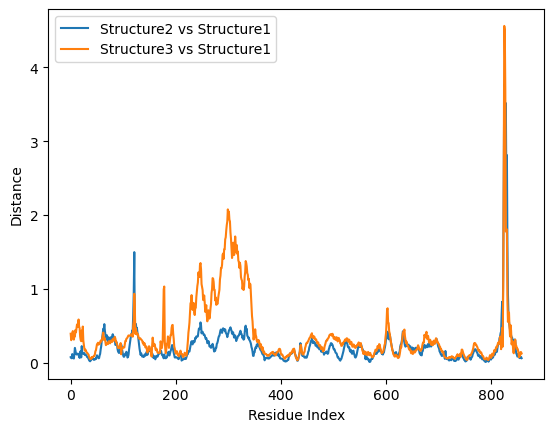

In [1]:
# PLOTTING, ONLY CHAIN A
from pymol import cmd
import numpy as np
import matplotlib.pyplot as plt

cmd.load('PIK3CB_guide_target.cif', 'structure1')
cmd.load('PIK3CB_pos3_mismatch.cif', 'structure2')
cmd.load('PIK3CB_pos7_mismatch.cif', 'structure3')

cmd.align('structure2', 'structure1')
cmd.align('structure3', 'structure1')

chains = ['A', 'B', 'C']

residues1 = cmd.get_model(f'structure1 and name CA and chain {"+".join(chains)}').atom
residues2 = cmd.get_model(f'structure2 and name CA and chain {"+".join(chains)}').atom
residues3 = cmd.get_model(f'structure3 and name CA and chain {"+".join(chains)}').atom

residues1_dict = {(atom.chain, int(atom.resi)): atom.coord for atom in residues1}
residues2_dict = {(atom.chain, int(atom.resi)): atom.coord for atom in residues2}
residues3_dict = {(atom.chain, int(atom.resi)): atom.coord for atom in residues3}

common_residues = sorted(set(residues1_dict.keys()).intersection(residues2_dict.keys(), residues3_dict.keys()))

index = []
distances2 = []
distances3 = []

for idx, key in enumerate(common_residues):
    coord1 = np.array(residues1_dict[key])
    coord2 = np.array(residues2_dict[key])
    coord3 = np.array(residues3_dict[key])

    dist2 = np.linalg.norm(coord2 - coord1)
    dist3 = np.linalg.norm(coord3 - coord1)

    index.append(idx)
    distances2.append(dist2)
    distances3.append(dist3)

plt.plot(index, distances2, label='Structure2 vs Structure1')
plt.plot(index, distances3, label='Structure3 vs Structure1')
plt.xlabel('Residue Index')
plt.ylabel('Distance')
plt.legend()
plt.show()


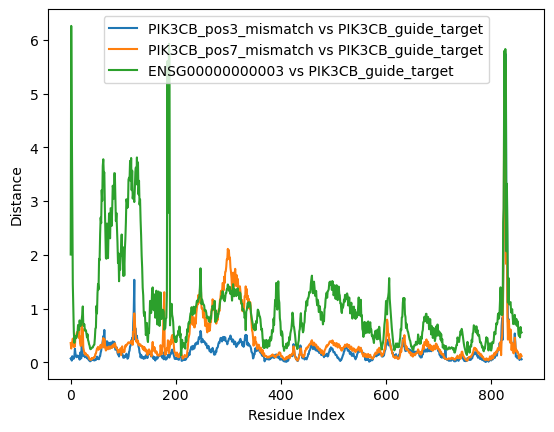

In [4]:
from pymol import cmd
import numpy as np
import matplotlib.pyplot as plt

cmd.reinitialize()

files = ['PIK3CB_guide_target.cif', 'PIK3CB_pos3_mismatch.cif', 'PIK3CB_pos7_mismatch.cif', 'ENSG00000000003.cif']
structures = []
for file in files:
    name = file.split('.')[0]
    cmd.load(file, name)
    structures.append(name)

for name in structures[1:]:
    cmd.align(name, structures[0])

chains = ['A', 'B', 'C']

residues = {}
for name in structures:
    selection = f'{name} and (name CA or name CB or name CC)'
    atoms = cmd.get_model(selection).atom
    residues[name] = {(atom.chain, int(atom.resi)): atom.coord for atom in atoms}

common_residues = sorted(set.intersection(*(set(residues[name].keys()) for name in structures)))

index = []
distances = {name: [] for name in structures[1:]}

for idx, key in enumerate(common_residues):
    coord_ref = np.array(residues[structures[0]][key])
    index.append(idx)
    for name in structures[1:]:
        coord = np.array(residues[name][key])
        dist = np.linalg.norm(coord - coord_ref)
        distances[name].append(dist)

for name in structures[1:]:
    plt.plot(index, distances[name], label=f'{name} vs {structures[0]}')

plt.xlabel('Residue Index')
plt.ylabel('Distance')
plt.legend()
plt.show()


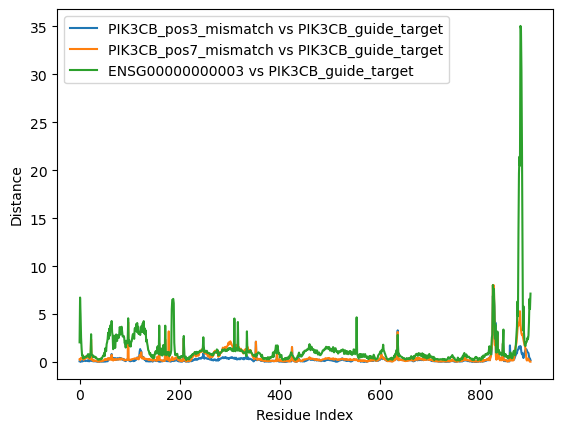

In [6]:
from pymol import cmd
import numpy as np
import matplotlib.pyplot as plt

cmd.reinitialize()

files = ['PIK3CB_guide_target.cif', 'PIK3CB_pos3_mismatch.cif', 'PIK3CB_pos7_mismatch.cif', 'ENSG00000000003.cif']
structures = []
for file in files:
    name = file.split('.')[0]
    cmd.load(file, name)
    structures.append(name)

for name in structures[1:]:
    cmd.align(name, structures[0])

residues = {}
for name in structures:
    cmd.select('all_atoms', f'{name}')
    atoms = cmd.get_model('all_atoms').atom
    residues[name] = {(atom.chain, int(atom.resi)): atom.coord for atom in atoms}

common_residues = sorted(set.intersection(*(set(residues[name].keys()) for name in structures)))

index = []
distances = {name: [] for name in structures[1:]}

for idx, key in enumerate(common_residues):
    coord_ref = np.array(residues[structures[0]][key])
    index.append(idx)
    for name in structures[1:]:
        coord = np.array(residues[name][key])
        dist = np.linalg.norm(coord - coord_ref)
        distances[name].append(dist)

for name in structures[1:]:
    plt.plot(index, distances[name], label=f'{name} vs {structures[0]}')

plt.xlabel('Residue Index')
plt.ylabel('Distance')
plt.legend()
plt.show()


In [ ]:
from pymol import cmd
import numpy as np

cmd.reinitialize()

files = ['PIK3CB_guide_target.cif', 'PIK3CB_pos3_mismatch.cif', 'PIK3CB_pos7_mismatch.cif', 'ENSG00000000003.cif']
structures = []
for file in files:
    name = file.split('.')[0]
    cmd.load(file, name)
    structures.append(name)

for name in structures[1:]:
    cmd.align(name, structures[0])

residues = {}
for name in structures:
    cmd.select('all_atoms', f'{name}')
    atoms = cmd.get_model('all_atoms').atom
    residues[name] = {(atom.chain, int(atom.resi)): (atom.resn, atom.coord) for atom in atoms}

common_residues = sorted(set.intersection(*(set(residues[name].keys()) for name in structures)))

for key in common_residues:
    resn_ref, coord_ref = residues[structures[0]][key]
    print(f"Structure: {structures[0]} | Chain: {key[0]} | Residue Name: {resn_ref} | Residue Index: {key[1]}")
    for name in structures[1:]:
        resn, coord = residues[name][key]
        dist = np.linalg.norm(np.array(coord) - np.array(coord_ref))
        print(f"Compared to {name}: Chain {key[0]} | Residue Name: {resn} | Residue Index: {key[1]} | Distance: {dist}")
    print("-" * 80)


In [13]:
# SELECTS ONLY CHAIN B and C
from pymol import cmd
import numpy as np

cmd.reinitialize()

files = ['PIK3CB_guide_target.cif', 'PIK3CB_pos3_mismatch.cif', 'PIK3CB_pos7_mismatch.cif', 'ENSG00000000003.cif']
structures = []
for file in files:
    name = file.split('.')[0]
    cmd.load(file, name)
    structures.append(name)

for name in structures[1:]:
    cmd.align(name, structures[0])

residues = {}
for name in structures:
    # Selecting only chains B and C
    cmd.select('chain_BC', f'{name} and (chain B or chain C)')
    atoms = cmd.get_model('chain_BC').atom
    residues[name] = {(atom.chain, int(atom.resi)): (atom.resn, atom.coord) for atom in atoms}

common_residues = sorted(set.intersection(*(set(residues[name].keys()) for name in structures)))

for key in common_residues:
    resn_ref, coord_ref = residues[structures[0]][key]
    print(f"Structure: {structures[0]} | Chain: {key[0]} | Residue Name: {resn_ref} | Residue Index: {key[1]}")
    for name in structures[1:]:
        resn, coord = residues[name][key]
        dist = np.linalg.norm(np.array(coord) - np.array(coord_ref))
        print(f"Compared to {name}: Chain {key[0]} | Residue Name: {resn} | Residue Index: {key[1]} | Distance: {dist}")
    print("-" * 80)


Structure: PIK3CB_guide_target | Chain: B | Residue Name: A | Residue Index: 1
Compared to PIK3CB_pos3_mismatch: Chain B | Residue Name: A | Residue Index: 1 | Distance: 1.7330058260264987
Compared to PIK3CB_pos7_mismatch: Chain B | Residue Name: A | Residue Index: 1 | Distance: 0.25992612623021644
Compared to ENSG00000000003: Chain B | Residue Name: A | Residue Index: 1 | Distance: 0.5981493085561254
--------------------------------------------------------------------------------
Structure: PIK3CB_guide_target | Chain: B | Residue Name: U | Residue Index: 2
Compared to PIK3CB_pos3_mismatch: Chain B | Residue Name: U | Residue Index: 2 | Distance: 0.48153255975412845
Compared to PIK3CB_pos7_mismatch: Chain B | Residue Name: U | Residue Index: 2 | Distance: 0.383924351191823
Compared to ENSG00000000003: Chain B | Residue Name: U | Residue Index: 2 | Distance: 1.0063847725329302
--------------------------------------------------------------------------------
Structure: PIK3CB_guide_targe

In [14]:
## GETS X Y AND Z COORDS
from pymol import cmd
cmd.reinitialize()
cmd.load('PIK3CB_guide_target.cif', 'guide_target')
cmd.select('first_resi_B', 'guide_target and chain B and resi 1')
model = cmd.get_model('first_resi_B')
print("Chain B, Residue 1, Atom Information:")
for atom in model.atom:
    print(f"Atom Name: {atom.name}, Chain: {atom.chain}, Residue Name: {atom.resn}, Residue Index: {atom.resi}, "
          f"Atom Index: {atom.index}, Coordinates: ({atom.coord[0]}, {atom.coord[1]}, {atom.coord[2]})")


Chain B, Residue 1, Atom Information:
Atom Name: P, Chain: B, Residue Name: A, Residue Index: 1, Atom Index: 6837, Coordinates: (15.40999984741211, -18.283000946044922, -7.35699987411499)
Atom Name: C5', Chain: B, Residue Name: A, Residue Index: 1, Atom Index: 6838, Coordinates: (12.975000381469727, -19.104999542236328, -6.794000148773193)
Atom Name: O5', Chain: B, Residue Name: A, Residue Index: 1, Atom Index: 6839, Coordinates: (14.326000213623047, -18.90999984741211, -6.427999973297119)
Atom Name: C4', Chain: B, Residue Name: A, Residue Index: 1, Atom Index: 6840, Coordinates: (12.52299976348877, -20.45400047302246, -6.3480000495910645)
Atom Name: O4', Chain: B, Residue Name: A, Residue Index: 1, Atom Index: 6841, Coordinates: (12.786999702453613, -20.618999481201172, -4.914000034332275)
Atom Name: C3', Chain: B, Residue Name: A, Residue Index: 1, Atom Index: 6842, Coordinates: (11.032999992370605, -20.774999618530273, -6.508999824523926)
Atom Name: O3', Chain: B, Residue Name: A, R

In [ ]:
## GRAPHING RESIDUES
from pymol import cmd
import numpy as np
import matplotlib.pyplot as plt

cmd.reinitialize()

files = ['PIK3CB_guide_target.cif', 'PIK3CB_pos3_mismatch_nophos.pdb']
structures = []
for file in files:
    name = file.split('.')[0]
    cmd.load(file, name)
    structures.append(name)

for name in structures[1:]:
    cmd.align(name, structures[0])

# Chain A graph
residues_A = {}
for name in structures:
    cmd.select('chain_A', f'{name} and chain A')
    atoms = cmd.get_model('chain_A').atom
    residues_A[name] = {(atom.chain, int(atom.resi)): atom.coord for atom in atoms}

common_residues_A = sorted(set.intersection(*(set(residues_A[name].keys()) for name in structures)))

index_A = []
distances_A = {name: [] for name in structures[1:]}

for idx, key in enumerate(common_residues_A):
    coord_ref = np.array(residues_A[structures[0]][key])
    index_A.append(idx)
    for name in structures[1:]:
        coord = np.array(residues_A[name][key])
        dist = np.linalg.norm(coord - coord_ref)
        distances_A[name].append(dist)

plt.figure(figsize=(10, 5))
for name in structures[1:]:
    plt.plot(index_A, distances_A[name], label=f'{name} vs {structures[0]}')

plt.xlabel('Residue Index')
plt.ylabel('Distance')
plt.title('Chain A Comparison')
plt.legend()
plt.show()

# Chains B and C graph
residues_BC = {}
for name in structures:
    cmd.select('chain_BC', f'{name} and (chain B or chain C)')
    atoms = cmd.get_model('chain_BC').atom
    residues_BC[name] = {(atom.chain, int(atom.resi)): atom.coord for atom in atoms}

common_residues_BC = sorted(set.intersection(*(set(residues_BC[name].keys()) for name in structures)))

index_BC = []
distances_BC = {name: [] for name in structures[1:]}
chain_order = []

for idx, key in enumerate(common_residues_BC):
    coord_ref = np.array(residues_BC[structures[0]][key])
    index_BC.append(idx)
    chain_order.append(f'{key[0]}{key[1]}')  # Store chain and residue number for x-axis
    for name in structures[1:]:
        coord = np.array(residues_BC[name][key])
        dist = np.linalg.norm(coord - coord_ref)
        distances_BC[name].append(dist)

plt.figure(figsize=(10, 5))
for name in structures[1:]:
    plt.plot(index_BC, distances_BC[name], label=f'{name} vs {structures[0]}')

plt.xticks(ticks=range(len(chain_order)), labels=chain_order, rotation=90)  # Set x-axis labels to chain and residue numbers
plt.xlabel('Chain and Residue')
plt.ylabel('Distance')
plt.title('Chains B and C Comparison')
plt.legend()
plt.show()


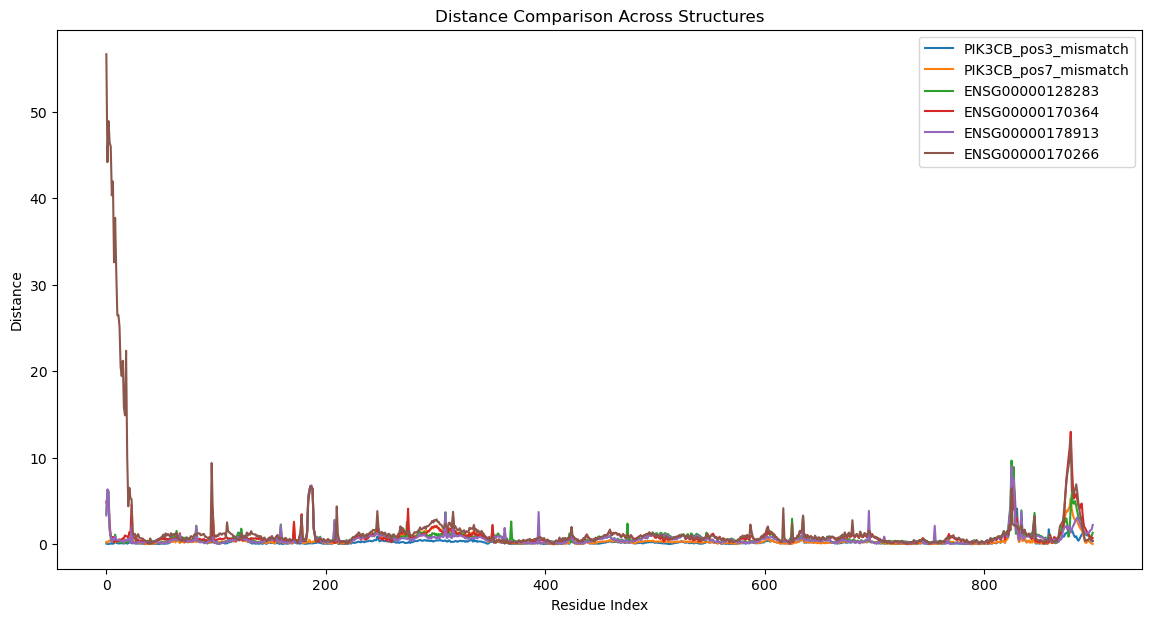

In [16]:
### NEED TO LOOK AT THIS OUTPUT FOR OUTLIERS
from pymol import cmd
import numpy as np
import matplotlib.pyplot as plt
import os
import random

cmd.reinitialize()

# Load base files
files = ['PIK3CB_guide_target.cif', 'PIK3CB_pos3_mismatch.cif', 'PIK3CB_pos7_mismatch.cif']

# Add 4 more random files from ../output_cifs directory
output_dir = '../output_cifs'
additional_files = random.sample(os.listdir(output_dir), 4)
files.extend([os.path.join(output_dir, file) for file in additional_files])

structures = []
for file in files:
    name = os.path.basename(file).split('.')[0]  # Just the file name without extension
    cmd.load(file, name)
    structures.append(name)

# Align all structures to the guide target (structure[0])
for name in structures[1:]:
    cmd.align(name, structures[0])

residues = {}
for name in structures:
    cmd.select('all_atoms', f'{name}')
    atoms = cmd.get_model('all_atoms').atom
    residues[name] = {(atom.chain, int(atom.resi)): atom.coord for atom in atoms}

common_residues = sorted(set.intersection(*(set(residues[name].keys()) for name in structures)))

index = []
distances = {name: [] for name in structures[1:]}

for idx, key in enumerate(common_residues):
    coord_ref = np.array(residues[structures[0]][key])
    index.append(idx)
    for name in structures[1:]:
        coord = np.array(residues[name][key])
        dist = np.linalg.norm(coord - coord_ref)
        distances[name].append(dist)

# Create the plot with larger size and modified labels
plt.figure(figsize=(14, 7))  # Increase the figure size

for name in structures[1:]:
    plt.plot(index, distances[name], label=name)  # Remove 'vs guide_target' from label

plt.xlabel('Residue Index')
plt.ylabel('Distance')
plt.title('Distance Comparison Across Structures')
plt.legend()
plt.show()


In [2]:
#### FINALLY GOT THE AMIDE. ISSUE WITH VALENCE. REWORKING CODE!
from pymol import cmd
import numpy as np
import matplotlib.pyplot as plt
import os
import random
cmd.reinitialize()
# RNASeq/test_alignment/ENSG00000174780.cif

cmd.load(cif_file, 'PIK3CB_guide_target') 
cmd.load('4f3t_v4G2c.pdb')

cmd.select('chainB_resi3_4', 'chain B and (resi 3 or resi 4)')
cmd.select('chainR_resi2_3', 'chain R and (resi 2 or resi 3)')
cmd.create('new_obj_chainR', 'chainR_resi2_3')
# cmd.extract('new_obj_chainR', 'chainR_resi2_3')
cmd.align('new_obj_chainR', 'chainB_resi3_4')
cmd.select('chainB_atoms', 'chain B and ((resi 3 and name O3\') or (resi 4 and (name OP1 or name OP2 or name P or name C5\' or name O5\')))')
cmd.select('keep_new_obj_chainR_atoms', 'new_obj_chainR and ((resi 2 and (name C or name O or name C6\')) or (resi 3 and (name N or name C5\')))')
cmd.remove('new_obj_chainR and not keep_new_obj_chainR_atoms')
cmd.remove('chainB_atoms')
cmd.create('PIK3CB_guide_target', 'PIK3CB_guide_target or new_obj_chainR')
cmd.select('atom1', 'PIK3CB_guide_target and chain B and resi 3 and name C3\'')
cmd.select('atom2', 'PIK3CB_guide_target and chain R and name C6\'')
cmd.bond('atom1', 'atom2')
cmd.select('atom3', 'PIK3CB_guide_target and chain B and resi 4 and name C4\'')
cmd.select('atom4', 'PIK3CB_guide_target and chain R and name C5\'')
cmd.bond('atom3', 'atom4')

distance_atom3_atom4 = cmd.get_distance('atom3', 'atom4')
coord_atom3 = np.array(cmd.get_atom_coords('atom3'))
coord_atom4 = np.array(cmd.get_atom_coords('atom4'))
vector3_4 = coord_atom4 - coord_atom3
vector3_4_normalized = vector3_4 / np.linalg.norm(vector3_4)
current_distance_3_4 = distance_atom3_atom4
desired_distance_3_4 = 1.6
translation_vector_3_4 = vector3_4_normalized * (current_distance_3_4 - desired_distance_3_4)
if current_distance_3_4 > desired_distance_3_4:
    cmd.translate(list(-translation_vector_3_4), 'atom4')
distance_atom1_atom2 = cmd.get_distance('atom1', 'atom2')
coord_atom1 = np.array(cmd.get_atom_coords('atom1'))
coord_atom2 = np.array(cmd.get_atom_coords('atom2'))
vector1_2 = coord_atom2 - coord_atom1
vector1_2_normalized = vector1_2 / np.linalg.norm(vector1_2)
current_distance_1_2 = distance_atom1_atom2
desired_distance_1_2 = 1.6
translation_vector_1_2 = vector1_2_normalized * (current_distance_1_2 - desired_distance_1_2)
if current_distance_1_2 > desired_distance_1_2:
    cmd.translate(list(-translation_vector_1_2), 'atom2')


cmd.alter('atom2', 'chain="B"')
cmd.alter('atom2', 'resi=3')
cmd.alter('atom2', 'resn="A"')
cmd.alter('atom2', 'segi="B"')
cmd.alter('chain R', 'resi=4')
cmd.alter('chain R', 'resn="G"')
cmd.alter('chain R', 'segi="B"')
cmd.alter('chain R', 'chain="B"')
cmd.alter("chain B and resi 3", "resn='R3'")
cmd.alter("chain B and resi 4", "resn='R4'")
###########
cmd.sort()
cmd.valence("guess", "all")


#REMOVE 5' PHOS CHAIN B/C
cmd.select("phosphate_atoms", "chain B and resi 1 and (name OP1 or name OP2 or name P)")
cmd.extract("phosphate_group", "phosphate_atoms")
cmd.remove("phosphate_atoms")
cmd.select("phosphate_atoms", "chain C and resi 1 and (name OP1 or name OP2 or name P)")
cmd.extract("phosphate_group", "phosphate_atoms")
cmd.remove("phosphate_atoms")
# iterate (chain B and resi 4), print(name, resn, resi, chain)

cmd.select("r3_r4", "resi 3+4 and chain B")
cmd.h_add("r3_r4")
cmd.sort()

cmd.save('PIK3CB_guide_target_amide_TER.pdb', 'PIK3CB_guide_target') # PIK3CB_guide_target_amide_final.pdb

def remove_first_ter_after_chain_b(input_pdb, output_pdb):
    chain_b_started = False
    ter_skipped = False

    with open(input_pdb, 'r') as infile, open(output_pdb, 'w') as outfile:
        for line in infile:
            if line.startswith("ATOM") or line.startswith("HETATM"):
                chain_id = line[21].strip()  # Column 5 (21st character in 0-indexed line)
                if chain_id == "B":
                    chain_b_started = True

            if chain_b_started and line.startswith("TER") and not ter_skipped:
                ter_skipped = True  # Skip the first TER after chain B starts
                continue

            outfile.write(line)  # Write all other lines
input_pdb = "PIK3CB_guide_target_amide_TER.pdb"
# output_pdb = "PIK3CB_guide_target_amide_final.pdb"
# remove_first_ter_after_chain_b(input_pdb, output_pdb)
output_pdb = os.path.splitext(cif_file)[0] + ".pdb"
remove_first_ter_after_chain_b(input_pdb, output_pdb)


In [ ]:
## AMIDE CODE VERSION FOR SLURM. VALENCE ISSUES
## AMIDE
import argparse
from pymol import cmd
import numpy as np
import os

def remove_first_ter_after_chain_b(input_pdb, output_pdb):
    chain_b_started = False
    ter_skipped = False

    with open(input_pdb, 'r') as infile, open(output_pdb, 'w') as outfile:
        for line in infile:
            if line.startswith("ATOM") or line.startswith("HETATM"):
                chain_id = line[21].strip()  # Column 5 (21st character in 0-indexed line)
                if chain_id == "B":
                    chain_b_started = True

            if chain_b_started and line.startswith("TER") and not ter_skipped:
                ter_skipped = True  # Skip the first TER after chain B starts
                continue

            outfile.write(line)  # Write all other lines

def main(cif_file):
    cmd.reinitialize()
    cmd.load(cif_file, 'PIK3CB_guide_target') 
    cmd.load('4f3t_v4G2c.pdb')
    
    cmd.select('chainB_resi3_4', 'chain B and (resi 3 or resi 4)')
    cmd.select('chainR_resi2_3', 'chain R and (resi 2 or resi 3)')
    cmd.create('new_obj_chainR', 'chainR_resi2_3')
    cmd.align('new_obj_chainR', 'chainB_resi3_4')
    cmd.select('chainB_atoms', 'chain B and ((resi 3 and name O3\') or (resi 4 and (name OP1 or name OP2 or name P or name C5\' or name O5\')))')
    cmd.select('keep_new_obj_chainR_atoms', 'new_obj_chainR and ((resi 2 and (name C or name O or name C6\')) or (resi 3 and (name N or name C5\')))')
    cmd.remove('new_obj_chainR and not keep_new_obj_chainR_atoms')
    cmd.remove('chainB_atoms')
    cmd.create('PIK3CB_guide_target', 'PIK3CB_guide_target or new_obj_chainR')
    cmd.select('atom1', 'PIK3CB_guide_target and chain B and resi 3 and name C3\'')
    cmd.select('atom2', 'PIK3CB_guide_target and chain R and name C6\'')
    cmd.bond('atom1', 'atom2')
    cmd.select('atom3', 'PIK3CB_guide_target and chain B and resi 4 and name C4\'')
    cmd.select('atom4', 'PIK3CB_guide_target and chain R and name C5\'')
    cmd.bond('atom3', 'atom4')

    distance_atom3_atom4 = cmd.get_distance('atom3', 'atom4')
    coord_atom3 = np.array(cmd.get_atom_coords('atom3'))
    coord_atom4 = np.array(cmd.get_atom_coords('atom4'))
    vector3_4 = coord_atom4 - coord_atom3
    vector3_4_normalized = vector3_4 / np.linalg.norm(vector3_4)
    current_distance_3_4 = distance_atom3_atom4
    desired_distance_3_4 = 1.6
    translation_vector_3_4 = vector3_4_normalized * (current_distance_3_4 - desired_distance_3_4)
    if current_distance_3_4 > desired_distance_3_4:
        cmd.translate(list(-translation_vector_3_4), 'atom4')
    
    distance_atom1_atom2 = cmd.get_distance('atom1', 'atom2')
    coord_atom1 = np.array(cmd.get_atom_coords('atom1'))
    coord_atom2 = np.array(cmd.get_atom_coords('atom2'))
    vector1_2 = coord_atom2 - coord_atom1
    vector1_2_normalized = vector1_2 / np.linalg.norm(vector1_2)
    current_distance_1_2 = distance_atom1_atom2
    desired_distance_1_2 = 1.6
    translation_vector_1_2 = vector1_2_normalized * (current_distance_1_2 - desired_distance_1_2)
    if current_distance_1_2 > desired_distance_1_2:
        cmd.translate(list(-translation_vector_1_2), 'atom2')
    
    cmd.alter('atom2', 'chain="B"')
    cmd.alter('atom2', 'resi=3')
    cmd.alter('atom2', 'resn="A"')
    cmd.alter('atom2', 'segi="B"')
    cmd.alter('chain R', 'resi=4')
    cmd.alter('chain R', 'resn="G"')
    cmd.alter('chain R', 'segi="B"')
    cmd.alter('chain R', 'chain="B"')
    cmd.alter("chain B and resi 3", "resn='R3'")
    cmd.alter("chain B and resi 4", "resn='R4'")
    
    cmd.sort()
    cmd.valence("guess", "all")
    
    cmd.select("phosphate_atoms", "chain B and resi 1 and (name OP1 or name OP2 or name P)")
    cmd.extract("phosphate_group", "phosphate_atoms")
    cmd.remove("phosphate_atoms")
    cmd.select("phosphate_atoms", "chain C and resi 1 and (name OP1 or name OP2 or name P)")
    cmd.extract("phosphate_group", "phosphate_atoms")
    cmd.remove("phosphate_atoms")
    
    cmd.select("r3_r4", "resi 3+4 and chain B")
    cmd.h_add("r3_r4")
    cmd.sort()
    
    cmd.save('PIK3CB_guide_target_amide_TER.pdb', 'PIK3CB_guide_target')
    
    input_pdb = "PIK3CB_guide_target_amide_TER.pdb"
    # output_pdb = os.path.splitext(cif_file)[0] + ".pdb"
    remove_first_ter_after_chain_b(input_pdb, "pdb_with_modification.pdb")


if __name__ == "__main__":
    import sys

    if len(sys.argv) != 2:
        print("Usage: python script_name.py path/to/your_cif_file.cif")
        sys.exit(1)
    cif_file = sys.argv[1]
    main(cif_file)

In [ ]:
#### AMIDE UPDATE 10-9
## AMIDE
import argparse
from pymol import cmd
import numpy as np
import os

def remove_first_ter_after_chain_b(input_pdb, output_pdb):
    chain_b_started = False
    ter_skipped = False

    with open(input_pdb, 'r') as infile, open(output_pdb, 'w') as outfile:
        for line in infile:
            if line.startswith("ATOM") or line.startswith("HETATM"):
                chain_id = line[21].strip()  # Column 5 (21st character in 0-indexed line)
                if chain_id == "B":
                    chain_b_started = True

            if chain_b_started and line.startswith("TER") and not ter_skipped:
                ter_skipped = True  # Skip the first TER after chain B starts
                continue

            outfile.write(line)  # Write all other lines

def main(cif_file):
    cmd.reinitialize()
    cif_file = "ENSG00000000460.cif"
    cmd.load(cif_file, 'PIK3CB_guide_target') 
    cmd.load('4f3t_v4G2c.pdb')
    
    cmd.select('chainB_resi3_4', 'chain B and (resi 3 or resi 4)')
    cmd.select('chainR_resi2_3', 'chain R and (resi 2 or resi 3)')
    cmd.create('new_obj_chainR', 'chainR_resi2_3')
    cmd.align('new_obj_chainR', 'chainB_resi3_4')
    cmd.select('chainB_atoms', 'chain B and ((resi 3 and name O3\') or (resi 4 and (name OP1 or name OP2 or name P or name C5\' or name O5\')))')
    cmd.select('keep_new_obj_chainR_atoms', 'new_obj_chainR and ((resi 2 and (name C or name O or name C6\')) or (resi 3 and (name N or name C5\')))')
    cmd.remove('new_obj_chainR and not keep_new_obj_chainR_atoms')
    cmd.remove('chainB_atoms')
    cmd.create('PIK3CB_guide_target', 'PIK3CB_guide_target or new_obj_chainR')
    cmd.select('atom1', 'PIK3CB_guide_target and chain B and resi 3 and name C3\'')
    cmd.select('atom2', 'PIK3CB_guide_target and chain R and name C6\'')
    cmd.bond('atom1', 'atom2')
    cmd.select('atom3', 'PIK3CB_guide_target and chain B and resi 4 and name C4\'')
    cmd.select('atom4', 'PIK3CB_guide_target and chain R and name C5\'')
    cmd.bond('atom3', 'atom4')

    distance_atom3_atom4 = cmd.get_distance('atom3', 'atom4')
    coord_atom3 = np.array(cmd.get_atom_coords('atom3'))
    coord_atom4 = np.array(cmd.get_atom_coords('atom4'))
    vector3_4 = coord_atom4 - coord_atom3
    vector3_4_normalized = vector3_4 / np.linalg.norm(vector3_4)
    current_distance_3_4 = distance_atom3_atom4
    desired_distance_3_4 = 1.6
    translation_vector_3_4 = vector3_4_normalized * (current_distance_3_4 - desired_distance_3_4)
    if current_distance_3_4 > desired_distance_3_4:
        cmd.translate(list(-translation_vector_3_4), 'atom4')
    
    distance_atom1_atom2 = cmd.get_distance('atom1', 'atom2')
    coord_atom1 = np.array(cmd.get_atom_coords('atom1'))
    coord_atom2 = np.array(cmd.get_atom_coords('atom2'))
    vector1_2 = coord_atom2 - coord_atom1
    vector1_2_normalized = vector1_2 / np.linalg.norm(vector1_2)
    current_distance_1_2 = distance_atom1_atom2
    desired_distance_1_2 = 1.6
    translation_vector_1_2 = vector1_2_normalized * (current_distance_1_2 - desired_distance_1_2)
    if current_distance_1_2 > desired_distance_1_2:
        cmd.translate(list(-translation_vector_1_2), 'atom2')
    
    cmd.alter('atom2', 'chain="B"')
    cmd.alter('atom2', 'resi=3')
    cmd.alter('atom2', 'resn="A"')
    cmd.alter('atom2', 'segi="B"')
    cmd.alter('chain R', 'resi=4')
    cmd.alter('chain R', 'resn="G"')
    cmd.alter('chain R', 'segi="B"')
    cmd.alter('chain R', 'chain="B"')
    cmd.alter("chain B and resi 3", "resn='R3'")
    cmd.alter("chain B and resi 4", "resn='R4'")
    ###########
    cmd.sort()
    cmd.valence("guess", "all")
    
    cmd.select("phosphate_atoms", "chain B and resi 1 and (name OP1 or name OP2 or name P)")
    cmd.extract("phosphate_group", "phosphate_atoms")
    cmd.remove("phosphate_atoms")
    cmd.select("phosphate_atoms", "chain C and resi 1 and (name OP1 or name OP2 or name P)")
    cmd.extract("phosphate_group", "phosphate_atoms")
    cmd.remove("phosphate_atoms")
    cmd.select("r3_r4", "resi 3+4 and chain B")
    cmd.h_add("r3_r4")
    cmd.sort()

    

    
    cmd.save('PIK3CB_guide_target_amide_TER.pdb', 'PIK3CB_guide_target')
    
    input_pdb = "PIK3CB_guide_target_amide_TER.pdb"
    remove_first_ter_after_chain_b(input_pdb, "pdb_with_modification.pdb")


if __name__ == "__main__":
    import sys

    if len(sys.argv) != 2:
        print("Usage: python script_name.py path/to/your_cif_file.cif")
        sys.exit(1)
    cif_file = sys.argv[1]
    main(cif_file)

In [10]:
## GNA2? CODE GOT BUGGY?
from pymol import cmd
import numpy as np
import matplotlib.pyplot as plt
import os
import random
cmd.reinitialize()

cmd.load('ENSG00000174780.cif')
cmd.load('5v2h.cif')
# cmd.remove('hydrogen')
cmd.select('t_methyl', '5v2h and chain A and resi 5 and (name C5M or name H5M1 or name H5M2 or name H5M3)')
cmd.remove('t_methyl')
cmd.select('sel_gna', '5v2h and chain A and resi 4-6')

cmd.create('gna', 'sel_gna')
cmd.select('gna46', 'gna and (resi 4 or resi 6)')
cmd.select('main68', 'ENSG00000174780 and chain B and (resi 6 or resi 8)')
cmd.align('gna46', 'main68')

cmd.remove('gna and (resi 4 or resi 6)')
cmd.remove('ENSG00000174780 and chain B and resi 7')
cmd.alter('gna', 'resi=7')
cmd.alter('gna', 'segi="B"')
cmd.alter('gna', 'chain="B"')
cmd.alter('gna', 'resn="GNAU"')
cmd.create('ENSG00000174780', 'ENSG00000174780 or gna')
cmd.select('atom1', 'ENSG00000174780 and chain B and resi 6 and name O3\'')
cmd.select('atom2', 'ENSG00000174780 and chain B and resi 7 and name P')
cmd.select('atom3', 'ENSG00000174780 and chain B and resi 7 and name O2G')
cmd.select('atom4', 'ENSG00000174780 and chain B and resi 8 and name P')
cmd.bond('atom1', 'atom2')
cmd.bond('atom3', 'atom4')
cmd.select("proton_site", "ENSG00000174780 and chain B and resi 7 and name C5")
cmd.edit("proton_site")
cmd.attach("H", 1, 1)
cmd.alter("(elem H and neighbor proton_site)", "name='H01'")
cmd.unpick()

distance_atom3_atom4 = cmd.get_distance('atom3', 'atom4')
coord_atom3 = np.array(cmd.get_atom_coords('atom3'))
coord_atom4 = np.array(cmd.get_atom_coords('atom4'))
vector3_4 = coord_atom4 - coord_atom3
vector3_4_normalized = vector3_4 / np.linalg.norm(vector3_4)
current_distance_3_4 = distance_atom3_atom4
desired_distance_3_4 = 1.6
translation_vector_3_4 = vector3_4_normalized * (current_distance_3_4 - desired_distance_3_4)
if current_distance_3_4 > desired_distance_3_4:
    cmd.select('translate_selection', 'ENSG00000174780 and chain B and resi 8-21')
    cmd.translate(list(-translation_vector_3_4), 'translate_selection')
distance_atom1_atom2 = cmd.get_distance('atom1', 'atom2')
coord_atom1 = np.array(cmd.get_atom_coords('atom1'))
coord_atom2 = np.array(cmd.get_atom_coords('atom2'))
vector1_2 = coord_atom2 - coord_atom1
vector1_2_normalized = vector1_2 / np.linalg.norm(vector1_2)
current_distance_1_2 = distance_atom1_atom2
desired_distance_1_2 = 1.6
translation_vector_1_2 = vector1_2_normalized * (current_distance_1_2 - desired_distance_1_2)
if current_distance_1_2 > desired_distance_1_2:
    cmd.select('translate_selection_1_6', 'ENSG00000174780 and chain B and resi 7-21')
    cmd.translate(list(-translation_vector_1_2), 'translate_selection_1_6')

#REMOVE 5' PHOS CHAIN B/C
cmd.select("phosphate_atoms", "chain B and resi 1 and (name OP1 or name OP2 or name P)")
cmd.extract("phosphate_group", "phosphate_atoms")
cmd.remove("phosphate_atoms")
cmd.select("phosphate_atoms", "chain C and resi 1 and (name OP1 or name OP2 or name P)")
cmd.extract("phosphate_group", "phosphate_atoms")
cmd.remove("phosphate_atoms")
cmd.save('ENSG00000174780_gna_TER.pdb', 'ENSG00000174780')

# def remove_first_ter_after_chain_b(input_pdb, output_pdb):
#     chain_b_started = False
#     ter_skipped = False

#     with open(input_pdb, 'r') as infile, open(output_pdb, 'w') as outfile:
#         for line in infile:
#             if line.startswith("ATOM") or line.startswith("HETATM"):
#                 chain_id = line[21].strip()  # Column 5 (21st character in 0-indexed line)
#                 if chain_id == "B":
#                     chain_b_started = True

#             if chain_b_started and line.startswith("TER") and not ter_skipped:
#                 ter_skipped = True  # Skip the first TER after chain B starts
#                 continue

#             outfile.write(line)  # Write all other lines
###
def remove_first_ter_after_chain_b(input_pdb, output_pdb):
    chain_b_started = False
    ter_skipped = False

    with open(input_pdb, 'r') as infile, open(output_pdb, 'w') as outfile:
        for line in infile:
            if line.startswith("ATOM") or line.startswith("HETATM"):
                chain_id = line[21].strip()  # Column 5 (21st character in 0-indexed line)
                
                # Change HETATM to ATOM if it is part of chain B
                if line.startswith("HETATM"):
                    line = line.replace("HETATM", "ATOM  ", 1)
                
                if chain_id == "B":
                    chain_b_started = True
            if line.startswith("CONECT") or line.startswith("ANISOU"):
                continue
            if chain_b_started and line.startswith("TER") and not ter_skipped:
                ter_skipped = True
                continue

            outfile.write(line)  # Write all other lines

input_pdb = "ENSG00000174780_gna_TER.pdb"
remove_first_ter_after_chain_b(input_pdb, "ENSG00000174780.pdb")



In [ ]:
## REMOVING SOME PHOSPHATES
from pymol import cmd
import numpy as np
import matplotlib.pyplot as plt
import os
import random

cmd.reinitialize()

import numpy as np

cmd.load('PIK3CB_pos7_mismatch.pdb')

#REMOVE 5' PHOS CHAIN B/C
cmd.select("phosphate_atoms", "chain B and resi 1 and (name OP1 or name OP2 or name P)")
cmd.extract("phosphate_group", "phosphate_atoms")
cmd.remove("phosphate_atoms")
cmd.select("phosphate_atoms", "chain C and resi 1 and (name OP1 or name OP2 or name P)")
cmd.extract("phosphate_group", "phosphate_atoms")
cmd.remove("phosphate_atoms")
# iterate (chain B and resi 4), print(name, resn, resi, chain)

cmd.sort()

cmd.save('PIK3CB_pos7_mismatch_nophos.pdb', 'PIK3CB_pos7_mismatch') # PIK3CB_guide_target_amide_final.pdb


In [ ]:
# PDB2GMX
import subprocess
import os
# os.environ["OMP_NUM_THREADS"] = "14"
os.environ['PATH'] = '/data/home/mrichte3/gromacs-2024.2/install/bin:' + os.environ['PATH']
if 'LD_LIBRARY_PATH' in os.environ:
    os.environ['LD_LIBRARY_PATH'] = '/data/home/mrichte3/gromacs-2024.2/install/lib:' + os.environ['LD_LIBRARY_PATH']
else:
    os.environ['LD_LIBRARY_PATH'] = '/data/home/mrichte3/gromacs-2024.2/install/lib'

def run_command(command):
    result = subprocess.run(command, capture_output=True, text=True)
    print(result.stdout)
    print(result.stderr)
    return result

command = ["gmx", "pdb2gmx", "-f", "PIK3CB_guide_target_amide_final.pdb", "-o", "structure_processed.gro", 
           "-p", "topol.top", "-i", "posre.itp"]
run_command(command)
### 6 then 7


In [ ]:
import subprocess
import os
os.environ['PATH'] = '/data/home/mrichte3/gromacs-2024.2/install/bin:' + os.environ['PATH']
if 'LD_LIBRARY_PATH' in os.environ:
    os.environ['LD_LIBRARY_PATH'] = '/data/home/mrichte3/gromacs-2024.2/install/lib:' + os.environ['LD_LIBRARY_PATH']
else:
    os.environ['LD_LIBRARY_PATH'] = '/data/home/mrichte3/gromacs-2024.2/install/lib'
os.environ['GMX_MAXBACKUP'] = '-1'
def run_command(command, input_text=None):
    """Run a shell command with optional input and capture output."""
    result = subprocess.run(command, capture_output=True, text=True, input=input_text)
    print(result.stdout)
    print(result.stderr)
    return result

def run_gromacs_commands():
    # gmx pdb2gmx command with selections
    command = ["gmx", "pdb2gmx", "-f", "ENSG00000174780.pdb", "-o", "structure_processed.gro", 
               "-p", "topol.top", "-i", "posre.itp"]
    input_text = "6\n1\n"        ############ 6 1 for custom
    run_command(command, input_text)

    # gmx editconf command
    command = ["gmx", "editconf", "-f", "structure_processed.gro", "-o", "structure_box.gro", "-c", "-d", "1.0", "-bt", "cubic"]
    run_command(command)

    # gmx solvate command
    command = ["gmx", "solvate", "-cp", "structure_box.gro", "-cs", "spc216.gro", "-o", "structure_solv.gro", "-p", "topol.top"]
    run_command(command)

    # gmx grompp command
    command = ["gmx", "grompp", "-f", "ions.mdp", "-c", "structure_solv.gro", "-p", "topol.top", "-o", "ions.tpr", "-maxwarn", "3"]
    run_command(command)

    # gmx genion command with selection
    command = ["gmx", "genion", "-s", "ions.tpr", "-o", "structure_solv_ions.gro", "-p", "topol.top", 
               "-pname", "NA", "-nname", "CL", "-neutral", "-conc", "0.15"]
    input_text = "14\n"
    run_command(command, input_text)

    # gmx make_ndx command with multiple selections
    command = ["gmx", "make_ndx", "-f", "structure_solv_ions.gro", "-o", "index.ndx"]
    input_text = "name 19 SOLV\n1 | 12\nname 20 SOLU\nq\n"
    run_command(command, input_text)

# Execute the GROMACS commands
run_gromacs_commands()

In [ ]:
import subprocess
import os
# os.environ["OMP_NUM_THREADS"] = "6"
os.environ['PATH'] = '/data/home/mrichte3/gromacs-2024.2/install/bin:' + os.environ['PATH']
if 'LD_LIBRARY_PATH' in os.environ:
    os.environ['LD_LIBRARY_PATH'] = '/data/home/mrichte3/gromacs-2024.2/install/lib:' + os.environ['LD_LIBRARY_PATH']
else:
    os.environ['LD_LIBRARY_PATH'] = '/data/home/mrichte3/gromacs-2024.2/install/lib'
os.environ['GMX_MAXBACKUP'] = '-1'

def run_command(command):
    result = subprocess.run(command, capture_output=True, text=True)
    print(result.stdout)
    print(result.stderr)
    return result

init = "structure_solv_ions"
# init = "structure_processed"
# init = "structure_box"

mini_prefix = "step4.0_minimization"
topol_file = "topol.top"
gro_file = f"{init}.gro"

command = ["gmx", "grompp", "-v", "-f", f"{mini_prefix}.mdp", "-o", f"{mini_prefix}.tpr", 
           # "-c", gro_file, "-r", gro_file, "-p", topol_file, "-maxwarn", "5"] #no index
           "-c", gro_file, "-r", gro_file, "-p", topol_file, "-n", "index.ndx", "-maxwarn", "5"]

run_command(command)

command = ["gmx", "mdrun", "-v", "-deffnm", mini_prefix, "-ntmpi", "1"]
run_command(command)



In [ ]:
# Equilibration
equi_prefix = "step4.1_equilibration"
command = ["gmx", "grompp", "-f", f"{equi_prefix}.mdp", "-o", f"{equi_prefix}.tpr", 
           # "-c", f"{mini_prefix}.gro", "-r", f"{init}.gro", "-p", "topol.top", "-maxwarn", "1"]
           "-c", f"{mini_prefix}.gro", "-r", f"{init}.gro", "-p", "topol.top", "-maxwarn", "1", "-n", "index.ndx"]
run_command(command)
command = ["gmx", "mdrun", "-v", "-deffnm", equi_prefix, "-ntmpi", "1"]
run_command(command)

In [ ]:
prod_prefix = "step5_production"
prod_step = "step5"
gpu_index = "0"
# os.environ["CUDA_VISIBLE_DEVICES"] = gpu_index
# os.environ["OMP_NUM_THREADS"] = "6"
import time
start_time = time.time()
command_grompp = ["gmx", "grompp", "-f", f"{prod_prefix}.mdp", "-o", f"{prod_step}.tpr",
                  # "-c", f"{equi_prefix}.gro", "-p", "topol.top", "-maxwarn", "2"]
                  "-c", f"{equi_prefix}.gro", "-p", "topol.top", "-maxwarn", "2", "-n", "index.ndx"]
run_command(command_grompp)

command_mdrun = ["gmx", "mdrun", "-v", "-deffnm", prod_step, "-ntmpi", "1"]
run_command(command_mdrun)
end_time = time.time()
elapsed_time = (end_time - start_time) / 60
print(f"{elapsed_time}")



In [11]:
import shutil
output_gro_file = f"{prod_step}.gro"
new_gro_file = f"step5_ENSG00000174780.gro"
shutil.move(output_gro_file, new_gro_file)


'step5_ENSG00000174780.gro'

In [ ]:
## SETTING UP SIMULATIONS AT 5, 10, 15, 20
import time
import shutil
import subprocess
import os
# os.environ["OMP_NUM_THREADS"] = "6"
os.environ['PATH'] = '/data/home/mrichte3/gromacs-2024.2/install/bin:' + os.environ['PATH']
if 'LD_LIBRARY_PATH' in os.environ:
    os.environ['LD_LIBRARY_PATH'] = '/data/home/mrichte3/gromacs-2024.2/install/lib:' + os.environ['LD_LIBRARY_PATH']
else:
    os.environ['LD_LIBRARY_PATH'] = '/data/home/mrichte3/gromacs-2024.2/install/lib'
    

def run_command(command):
    result = subprocess.run(command, capture_output=True, text=True)
    print(result.stdout)
    print(result.stderr)
    return result
    
equi_prefix = "step4.1_equilibration"
prod_prefix = "step5_production"
prod_step = "step5"
initialfile = "step5_production_nonsteps.mdp"
finalfile = "step5_production.mdp"
times = []

# Loop over 4 iterations with increasing nsteps
for i in range(50000, 250000, 50000):
    # Modify the .mdp file
    with open(initialfile, "r") as infile, open(finalfile, "w") as outfile:
        for line in infile:
            outfile.write(line)
        # Append the nsteps line
        outfile.write(f"nsteps = {i}\n")
    
    # Run grompp
    start_time = time.time()
    command_grompp = ["gmx", "grompp", "-f", f"{prod_prefix}.mdp", "-o", f"{prod_step}.tpr",
                      "-c", f"{equi_prefix}.gro", "-p", "topol.top", "-maxwarn", "2", "-n", "index.ndx"]
    run_command(command_grompp)

    # Run mdrun
    command_mdrun = ["gmx", "mdrun", "-v", "-deffnm", prod_step, "-ntmpi", "1"]
    run_command(command_mdrun)
    
    # Store the elapsed time
    end_time = time.time()
    elapsed_time = (end_time - start_time) / 60
    times.append(elapsed_time)
    
    # Rename the output file
    output_gro_file = f"{prod_step}.gro"
    new_gro_file = f"{prod_step}_{i}_iterations.gro"
    shutil.move(output_gro_file, new_gro_file)

# Print all recorded times at the end
for idx, t in enumerate(times, start=1):
    print(f"Iteration {idx} runtime: {t} minutes")

# Iteration 1 runtime: 4.63659546772639 minutes
# Iteration 2 runtime: 9.493460138638815 minutes
# Iteration 3 runtime: 14.123742723464966 minutes
# Iteration 4 runtime: 18.911043441295625 minutes


In [ ]:
## SETING UP SIMULATIONS AT 5 10 15 20, BUT CONTINUE INSTEAD OF FRESH
# FROM ENSG00000174780
import time
import shutil
import subprocess
import os
os.environ['GMX_MAXBACKUP'] = '-1'
os.environ['PATH'] = '/data/home/mrichte3/gromacs-2024.2/install/bin:' + os.environ['PATH']
if 'LD_LIBRARY_PATH' in os.environ:
    os.environ['LD_LIBRARY_PATH'] = '/data/home/mrichte3/gromacs-2024.2/install/lib:' + os.environ['LD_LIBRARY_PATH']
else:
    os.environ['LD_LIBRARY_PATH'] = '/data/home/mrichte3/gromacs-2024.2/install/lib'

def run_command(command):
    result = subprocess.run(command, capture_output=True, text=True)
    print(result.stdout)
    print(result.stderr)
    return result

equi_prefix = "step4.1_equilibration"
prod_prefix = "step5_production"
prod_step = "step5"
times = []

input_gro_file = f"{equi_prefix}.gro"
additional_steps = 50000
for i in range(1, 5):
    print(f"i equals {i}")
    if i == 1:
        command_grompp = ["gmx", "grompp", "-f", f"{prod_prefix}.mdp", "-o", f"{prod_step}.tpr",
                          "-c", f"{equi_prefix}.gro", "-p", "topol.top", "-maxwarn", "2", "-n", "index.ndx"]
        run_command(command_grompp)
        command_mdrun = ["gmx", "mdrun", "-v", "-deffnm", prod_step, "-ntmpi", "1"]
        run_command(command_mdrun)
        shutil.copy("step5.gro", "step5_50000_iterations.gro")
    else:

        cpt_file = f"{prod_step}.cpt"
        command_mdrun = ["gmx", "mdrun", "-v", "-deffnm", prod_step, "-ntmpi", "1", "-nsteps", str(additional_steps)]
        
        if os.path.exists(cpt_file):
            command_mdrun += ["-cpi", cpt_file]
    
        start_time = time.time()
        run_command(command_mdrun)
        
        end_time = time.time()
        elapsed_time = (end_time - start_time) / 60
        times.append(elapsed_time)
        
        output_gro_file = f"{prod_step}.gro"
        new_gro_file = f"{prod_step}_{i * additional_steps}_iterations.gro"
        shutil.copy(output_gro_file, new_gro_file)

for idx, t in enumerate(times, start=1):
    print(f"Iteration {idx} runtime: {t} minutes")



In [ ]:
## GETS PROTON BINDING FOR FF
from pymol import cmd
cmd.reinitialize()
# Load the structure
cmd.load("AAGNAUC.mol2")

# Iterate through all hydrogen atoms in resi 4 of chain B
for hydrogen in cmd.get_model("resi 5 and elem H").atom:
    closest_atom = None
    closest_distance = float("inf")
    
    # Iterate through all atoms in resi 4, chain B (excluding the hydrogen itself)
    for atom in cmd.get_model("resi 5 and not elem H").atom:
        distance = cmd.get_distance(f"resi 5 and name {hydrogen.name}", f"resi 5 and name {atom.name}")
        
        if distance < closest_distance:
            closest_distance = distance
            closest_atom = atom
    
    # Print the hydrogen and the closest atom it is bonded to
    print(f"Hydrogen {hydrogen.name} is closest to atom {closest_atom.name} with distance {closest_distance:.3f} Å")


In [ ]:
## COUNTING ATOMS
from pymol import cmd
import os

cmd.reinitialize()

# Files to process
files = ['PIK3CB_guide_target.cif', 'PIK3CB_pos3_mismatch.cif', 'PIK3CB_pos7_mismatch.cif', 
         'step4.0_minimization.gro', 'PIK3CB_guide_target_nophos.pdb']

# Function to count atoms in a structure
def count_atoms(structure):
    atoms = cmd.get_model(structure).atom
    return len(atoms)

# Function to count atoms excluding protons
def count_atoms_without_protons(structure):
    atoms = cmd.get_model(structure).atom
    non_protons = [atom for atom in atoms if not atom.name.startswith('H')]
    return len(non_protons)

# Load all files and get atom counts
for file in files:
    structure_name = os.path.basename(file).split('.')[0]  # Just the file name without extension
    cmd.load(file, structure_name)
    
    # Get atom count before proton removal
    total_atoms = count_atoms(structure_name)
    
    # Get atom count after proton removal
    non_proton_atoms = count_atoms_without_protons(structure_name)
    
    print(f"File: {file}")
    print(f"Total atoms: {total_atoms}")
    print(f"Non-proton atoms: {non_proton_atoms}")
    print("-" * 40)

